# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [85]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from loguru import logger

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [81]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

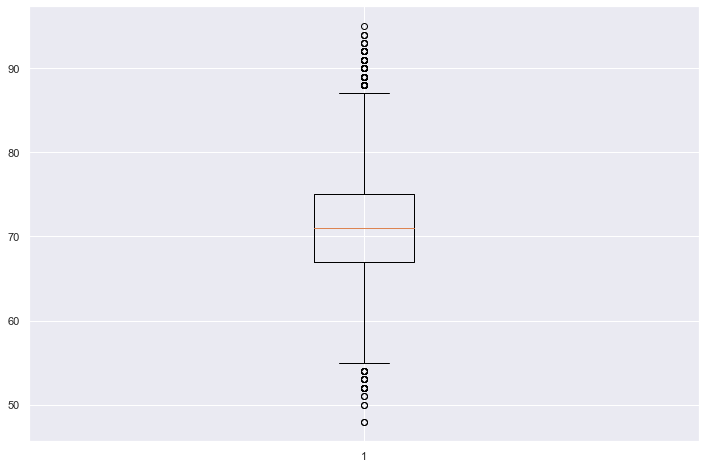

In [80]:
_ = plt.boxplot(fifa['Potential'])

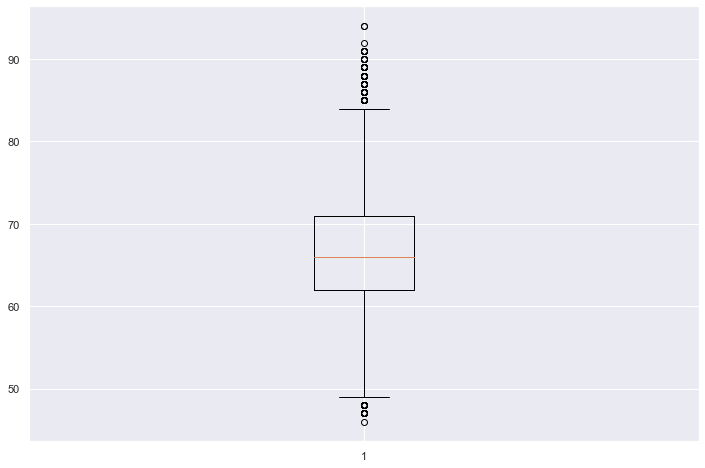

In [79]:
_ = plt.boxplot(fifa['Overall'])

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Overall          18207 non-null  int64  
 2   Potential        18207 non-null  int64  
 3   Crossing         18159 non-null  float64
 4   Finishing        18159 non-null  float64
 5   HeadingAccuracy  18159 non-null  float64
 6   ShortPassing     18159 non-null  float64
 7   Volleys          18159 non-null  float64
 8   Dribbling        18159 non-null  float64
 9   Curve            18159 non-null  float64
 10  FKAccuracy       18159 non-null  float64
 11  LongPassing      18159 non-null  float64
 12  BallControl      18159 non-null  float64
 13  Acceleration     18159 non-null  float64
 14  SprintSpeed      18159 non-null  float64
 15  Agility          18159 non-null  float64
 16  Reactions        18159 non-null  float64
 17  Balance     

In [8]:
fifa.isna().any()

Age                False
Overall            False
Potential          False
Crossing            True
Finishing           True
HeadingAccuracy     True
ShortPassing        True
Volleys             True
Dribbling           True
Curve               True
FKAccuracy          True
LongPassing         True
BallControl         True
Acceleration        True
SprintSpeed         True
Agility             True
Reactions           True
Balance             True
ShotPower           True
Jumping             True
Stamina             True
Strength            True
LongShots           True
Aggression          True
Interceptions       True
Positioning         True
Vision              True
Penalties           True
Composure           True
Marking             True
StandingTackle      True
SlidingTackle       True
GKDiving            True
GKHandling          True
GKKicking           True
GKPositioning       True
GKReflexes          True
dtype: bool

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [33]:
pca = PCA().fit(fifa.dropna())
evr = pca.explained_variance_ratio_

In [34]:
def q1():
    return float(round(evr[0],3))

In [35]:
q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [37]:
def get_number_comps(evr_cumsum):
    comps = 1
    while evr_cumsum[comps-1] < 0.95:
        comps = comps + 1
    return comps

In [83]:
def q2():
    #return get_number_comps(np.cumsum(evr))
    return int(np.argmax(np.cumsum(evr) >= 0.95) + 1)

In [84]:
q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [32]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [45]:
len(x)

37

In [48]:
pca.components_

array([[-6.16388751e-03, -3.70623864e-02, -2.27401748e-02, ...,
         1.91129889e-01,  1.97401130e-01,  2.08994083e-01],
       [ 8.87203494e-03,  1.58367355e-04, -7.78142440e-03, ...,
        -5.14942445e-02, -5.14745248e-02, -5.52340572e-02],
       [ 9.84206291e-02,  2.04339855e-01,  9.50820413e-02, ...,
         2.93758717e-01,  3.07480231e-01,  3.20998523e-01],
       ...,
       [ 1.36565256e-03,  7.18377075e-03, -7.50009269e-04, ...,
        -4.84151364e-02, -4.47127432e-02,  6.56387319e-01],
       [ 5.53542477e-01,  6.30337955e-01,  2.43391671e-01, ...,
         1.16015772e-02, -1.80358372e-01, -1.53714829e-02],
       [ 5.64377667e-01, -6.46636967e-01,  5.04199457e-01, ...,
         7.95845835e-03, -1.18786610e-02,  3.10873931e-02]])

In [62]:
#Produto interno entre os componentes do PCA e o ponto X para encontrar as coordenadas (1º e 2º componentes)
np.dot(x,pca.components_[0])

186.55588030738113

In [63]:
np.dot(x,pca.components_[1])

-6.592431768430421

In [64]:
def q3():
    el1 = round(np.dot(x,pca.components_[0]),3)
    el2 = round(np.dot(x,pca.components_[1]),3)
    return (el1, el2)

In [65]:
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(fifa.dropna().drop('Overall',axis=1), fifa.dropna()['Overall'], test_size = 0.30, random_state = 42)

In [93]:
estimator = LinearRegression()

In [94]:
selector = RFE(estimator, n_features_to_select=5, step=1)

In [95]:
selector.fit(X_train, Y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [96]:
selector.support_

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [106]:
X_train.columns[selector.support_]

Index(['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes'], dtype='object')

In [107]:
def q4():
    X_train, X_test, Y_train, Y_test = train_test_split(fifa.dropna().drop('Overall',axis=1), fifa.dropna()['Overall'], test_size = 0.30, random_state = 42)
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=5, step=1)
    selector.fit(X_train, Y_train)
    colunas = X_train.columns[selector.support_]
    return list(colunas)

In [108]:
q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']